In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np

### Функция разметки

In [3]:
# Функции
def show_result(img_original_path, img_anon_path):
    
    img_original = plt.imread(img_original_path)
    img_anon = plt.imread(img_anon_path)

    fig, axes = plt.subplots(1, 2)

    # Оригинал картинки
    axes[0].imshow(img_original, cmap="gray")
    axes[0].set_title('Оригинальный документ')

    for axis in ['top','bottom','left','right']:
        axes[0].spines[axis].set_linewidth(20)
        axes[0].spines[axis].set_color("whitesmoke")
        axes[0].spines[axis].set_zorder(0)
    axes[0].axes.xaxis.set_visible(False)
    axes[0].axes.yaxis.set_visible(False)

    # Анонимизированная картинки
    axes[1].imshow(img_anon, cmap="gray")
    axes[1].set_title('Анонимизированный документ')

    for axis in ['top','bottom','left','right']:
        axes[1].spines[axis].set_linewidth(20)
        axes[1].spines[axis].set_color("whitesmoke")
        axes[1].spines[axis].set_zorder(0)

    axes[1].axes.xaxis.set_visible(False)
    axes[1].axes.yaxis.set_visible(False)

    # Настроить размер
    fig.set_figwidth(19)    #  ширина и
    fig.set_figheight(15)    #  высота "Figure"
    plt.show()


def leli_marking(row):
    img_original_path = row['img_origin']
    img_anon_path = row['img_anon']
    text_corpus = row['text_corpus']
    full_name_list = row['full_name_list']
    
    display(f'-------------- img_original VS img_anon --------------')
    display(f'Адрес оригинала: {img_original_path}')
    display(f'Адрес анонимированной картинки: {img_anon_path}')
    show_result(img_original_path, img_anon_path)
    display('')
    display(f'-------------- text_corpus --------------')
    display(text_corpus)
    
    full_name_list_valid = input('Пропущенные ФИО')
    if len(full_name_list_valid) > 0:
        full_name_list_valid = full_name_list_valid.split(',')
    else:
        full_name_list_valid = np.nan
    
    display('')
    display(f'-------------- full_name_list --------------')
    display(full_name_list)
    exclusion = input('Исключения (Станза ошиблась, это не часть ФИО):')
    if len(exclusion) > 0:
        exclusion = exclusion.split(',')
    else:
        exclusion = np.nan
    
    display('')
    doc_type = input('Тип документа:')
    if len(doc_type) > 0:
        doc_type = int(doc_type)
    else:
        doc_type = input('Обязательно введи тип документа:')
        doc_type = int(doc_type)
        
    clear_output(wait=True)
    marking_status = 1
    return pd.Series([full_name_list_valid, doc_type, exclusion, marking_status])

### Данные

In [7]:
# Загрузка данных
data = pd.read_csv('/home/jupyter/mnt/s3/lct2021/leaders_liga/tests/testsample_clear.csv').loc[0:100]
data.head(1)

,img_origin,img_anon,text_corpus,full_name_list,tesseract_score,mila_score,full_name_list_valid,exclusion,doc_type,marking_status
0,/home/jupyter/mnt/s3/lct2021/leaders_liga/test...,/home/jupyter/mnt/s3/lct2021/leaders_liga/test...,1000 Государственное бюджетное...,"['Борисовна', 'Соколова', 'Наталия', 'Соколова...",1,1,NaN,NaN,NaN,NaN


**Описание полей**
* `img_origin` — ссылка на оригинальную картинку, без куррент директори
* `img_anon` — ссылка на аномизированную картинку
* `text_corpus` — корпус текста, который дает тессеракт
* `full_name_list` — список ФИО, которые дает станза
* `full_name_list_valid` — список подстрок ФИО, которых не хватает ('Иванова','Надежда'), если все, то NaN
* `exclusion` — исключения, то что закрашено, но что не нужно было закрашивать
* `doc_type` — тип документа
    * 0 простой текст
    * 1 двухколоночный текст без таблицы
    * 2 двухколоночный текст с горизонтальным разделителем (обычно заголовок) или с разной версткой на одной таблице
    * 3 простые таблицы, в которых в одной строке таблицы (именно таблицы) всего 1 строка текста без переноса
    * 4 таблицы «награждается», в строках такой таблицы есть перенос строк текста
    * 5 таблицы «декларации», таблицы, в которых нет конекста для Станзы
    * 6 «особенный», не подпадающий по определение категорий выше, или имеющий какую уникальную деталь

### Пример работы

**Инструкция**

* Тебе нужно запонлить 3 инпута: Пропущенные ФИО, Ошибочно определенные ФИО, Тип документа
* Пиши все 1 в 1 как в `text_corpus` (включая регистр), каждое слово отдельно через запятую, вот так: Вишневский, Андрей, Юрьевич
* Инициалы
    * Если ФИО написано с инициалами <b>с пробелом</b>, пиши их как отдельное слово через запятую, вот так: Вишневский, В.Ю.
    * Если ФИО написано слитно с инициалами, пиши их как одно слово, вот так: ВишневскийВ.Ю.
* Если все ок, просто жми enter, в таблицу запишется NaN

'-------------- img_original VS img_anon --------------'

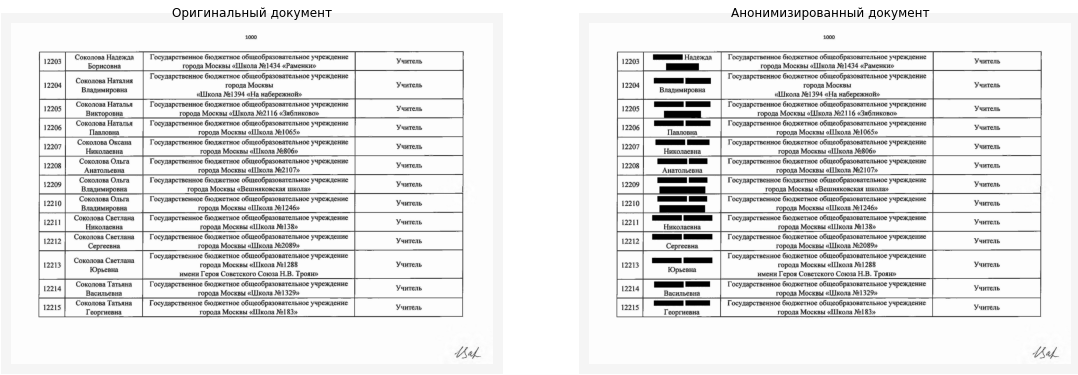

''

'-------------- text_corpus --------------'

'1000                 Государственное бюджетное общеобразовательное учреждение города Москвы «Школа №1434 «Раменки»    Соколова Надеж. 12203 влежла Учитель Борисовна Государственное бюджетное общеобразовательное учреждение Соколова Наталия удар иж и р Утрежл 12204 ини города Москвы Учитель р «Школа №1394 «На набережной» Соколова Наталья Государственное бюджетное общеобразовательное учреждение 12205 а Учитель Викторовна города Москвы «Школа №2116 «Зябликово» т Соколова Наталья Государственное бюджетное общеобразовательное учреждение 12206 Учитель Павловна города Москвы «Школа №1065» Соколова Оксана Государственное бюджетное общеобразовательное учреждение | 12207 м Учитель Николаевна города Москвы «Школа №806» Соколова Ольга Государственное бюджетное общеобразовательное учреждение 12208 Учитель Анатольевна города Москвы «Школа №2107» 12209 Соколова Ольга Государственное бюджетное общеобразовательное учреждение  УЧИтель Владимировна города Москвы «Вешняковская школа» | Соколова Ольга Госу

Пропущенные ФИО Надежда, Владимировна, Павловна, Николаевна, Анатольевна, Сергеевна, Юрьевна, Васильевна, Георгиевна


''

'-------------- full_name_list --------------'

"['Борисовна', 'Соколова', 'Наталия', 'Соколова', 'Наталья', 'Викторовна', 'Соколова', 'Оксана', 'Соколова', 'Ольга', 'Соколова', 'Ольга', 'Соколова', 'Ольга', 'Владимировна', 'Соколова', 'Светлана', 'Соколова', 'Светлана', 'Соколова', 'Татьяна']"

Исключения (Станза ошиблась, это не часть ФИО): 


''

Тип документа: 4


In [8]:
# Маркировка пример
data[['full_name_list_valid', 'doc_type', 'exclusion', 'marking_status']] = data.head(1).apply(leli_marking, axis=1)

In [9]:
# Вот размеченная строка
data.head(1)

,img_origin,img_anon,text_corpus,full_name_list,tesseract_score,mila_score,full_name_list_valid,exclusion,doc_type,marking_status
0,/home/jupyter/mnt/s3/lct2021/leaders_liga/test...,/home/jupyter/mnt/s3/lct2021/leaders_liga/test...,1000 Государственное бюджетное...,"['Борисовна', 'Соколова', 'Наталия', 'Соколова...",1,1,"[Надежда, Владимировна, Павловна, Николаевн...",NaN,4.0,1.0


In [15]:
# Если нужно посмотреть картинку крупнее
# Замени адрес path и запусти ячейку
path = '/home/jupyter/mnt/s3/lct2021/leaders_liga/tests//anonimized/./documents_files_7114_Svedeniya_o_dohodah_2020/page_2.jpg'
plt.figure(figsize = (100,100))
plt.imshow(plt.imread(path))

### Разметка процесс

In [13]:
# data[['full_name_list_valid', 'doc_type', 'exclusion', 'marking_status']] = data.query('marking_status != 1').apply(leli_marking, axis=1)

### Сохранение результата

In [14]:
# who = 'mila'
# data.to_csv(f'/home/jupyter/mnt/s3/lct2021/leaders_liga/tests/testsample_clear_{}_marking.csv', index=False)